<a href="https://colab.research.google.com/github/aremartins/-CombineLastest-do-rxjs-para-filtro-de-dados-em-tabelas/blob/main/Copy_of_Beginner01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [ ]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np
import pandas  as pd


In [ ]:
# Read the data from the CSV file with read from Numpy
data = np.genfromtxt("Salary_dataset.csv", delimiter=",", skip_header=1)


print(data)



[[0.00000e+00 1.20000e+00 3.93440e+04]
 [1.00000e+00 1.40000e+00 4.62060e+04]
 [2.00000e+00 1.60000e+00 3.77320e+04]
 [3.00000e+00 2.10000e+00 4.35260e+04]
 [4.00000e+00 2.30000e+00 3.98920e+04]
 [5.00000e+00 3.00000e+00 5.66430e+04]
 [6.00000e+00 3.10000e+00 6.01510e+04]
 [7.00000e+00 3.30000e+00 5.44460e+04]
 [8.00000e+00 3.30000e+00 6.44460e+04]
 [9.00000e+00 3.80000e+00 5.71900e+04]
 [1.00000e+01 4.00000e+00 6.32190e+04]
 [1.10000e+01 4.10000e+00 5.57950e+04]
 [1.20000e+01 4.10000e+00 5.69580e+04]
 [1.30000e+01 4.20000e+00 5.70820e+04]
 [1.40000e+01 4.60000e+00 6.11120e+04]
 [1.50000e+01 5.00000e+00 6.79390e+04]
 [1.60000e+01 5.20000e+00 6.60300e+04]
 [1.70000e+01 5.40000e+00 8.30890e+04]
 [1.80000e+01 6.00000e+00 8.13640e+04]
 [1.90000e+01 6.10000e+00 9.39410e+04]
 [2.00000e+01 6.90000e+00 9.17390e+04]
 [2.10000e+01 7.20000e+00 9.82740e+04]
 [2.20000e+01 8.00000e+00 1.01303e+05]
 [2.30000e+01 8.30000e+00 1.13813e+05]
 [2.40000e+01 8.80000e+00 1.09432e+05]
 [2.50000e+01 9.10000e+00

In [ ]:
# Separate the features (YearsExperience) from the target variable (Salary)

with open("Salary_dataset.csv") as f:
    header = f.readline().strip().split(",")


# Get the names of the columns
yearsExpericence = header[1]
salary = header[2]

# Print the names of the columns
X = yearsExpericence
y = salary
print(X, y)


YearsExperience Salary


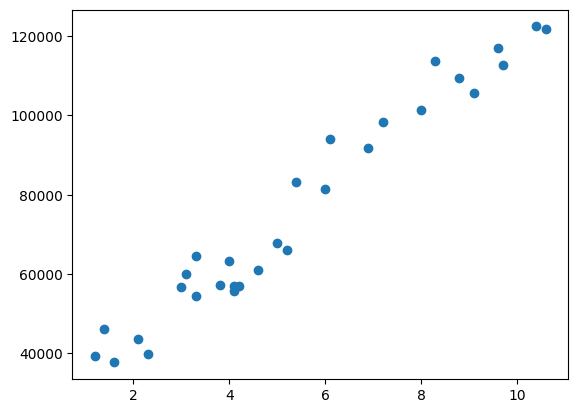

In [ ]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt


#You have to reproduce this graph

# Extract the data from the NumPy array
X = data[:, 1]
y = data[:, 2]

# Create the scatter plot
plt.scatter(X, y)



plt.show()


In [ ]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    x_new = np.linspace(np.min(X), np.max(X), 100)
    y_predicted = theta[0] + theta[1] * x_new
    plt.plot(X, y, '.', x_new, y_predicted, '-')
    plt.show()

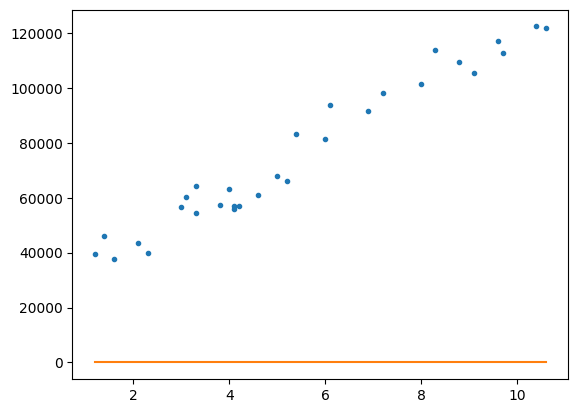

In [ ]:
# Ok, let's test our function now, you should get a result comparable to this one



theta = np.zeros(2)
visualize(theta, X, y)

# Try different values for theta
#theta2 = np.array([3000, 1000])
#visualize(theta2, X, y)

#theta3 = np.array([29000, 9000])
#visualize(theta3, X, y)

In [ ]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

#calcular as previsões do modelo de regressão linear simples para cada entrada em X, multiplicando cada elemento pelo
#coeficiente angular theta[1] e adicionando o intercepto theta[0]

def predict(X, theta):
    # Extrair os parâmetros do modelo
    theta_0 = theta[0]
    theta_1 = theta[1]

    # Calcular as previsões
    predictions = theta_0 + theta_1 * X # Multiplica cada elemento de X pelo coeficiente angular e adiciona o intercepto

    return predictions







In [ ]:
def descent_gradient(X, y, theta, alpha, num_iters, m):
    y_pred = predict(X, theta)
    erro = y_pred - y

    gradient = np.dot(erro, X) / m
    theta[1] -= (alpha * gradient)
    theta[0] -= (alpha * np.mean(erro))

    return theta, erro


In [ ]:
def fit(X, y, theta, alpha, num_iters):

    # Inicializar algumas variáveis úteis
    m = X.shape[0]  # Número de exemplos de treinamento

    # Loop sobre o número de iterações
    for _ in range(num_iters):
      theta = descent_gradient(X, y, theta, alpha, num_iters, m)[0]

    # Retornar os parâmetros ajustados e o histórico da função de custo
    return theta

In [ ]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]




[21912.58918422  9880.81400461]


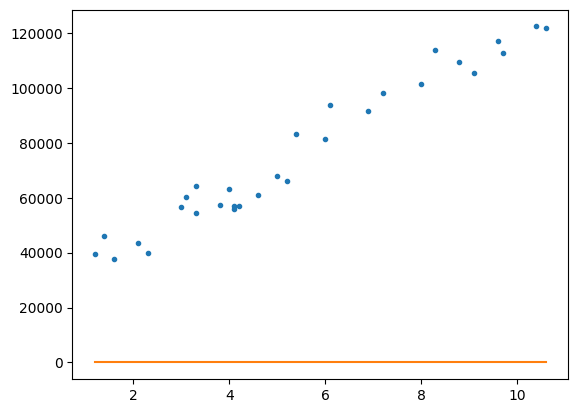

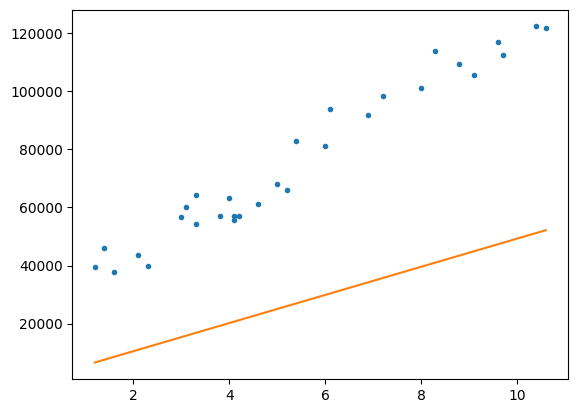

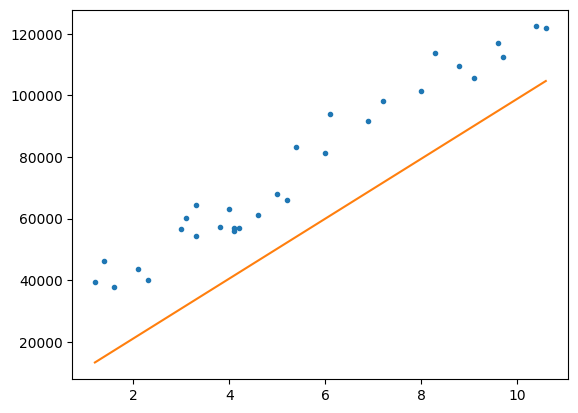

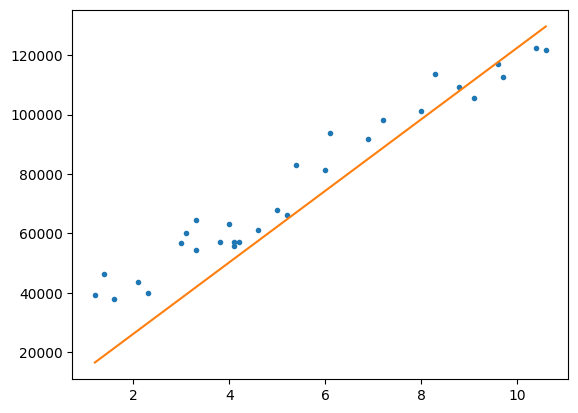

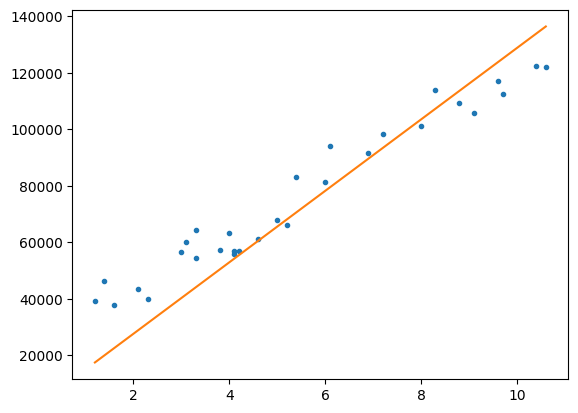

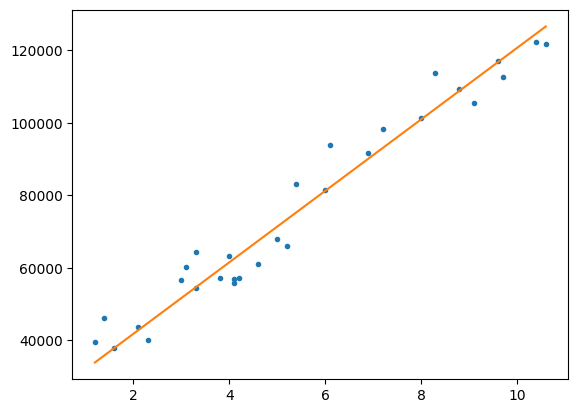

In [ ]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [ ]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    predictions = predict(X, theta)
    error = predictions - y

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    squared_error = np.sum(error ** 2)
    m = len(y)
    cost = squared_error / (2 * m)

    # Return the computed cost as a measure of model fit
    return cost



In [ ]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [ ]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):

      #Define o valor de theta e o valor de erros
      theta, errors = descent_gradient(X, y, theta, alpha, num_iters, m)

      cost = (1/(2*m)) * np.sum(np.square(errors))
      J_history.append(cost)  # Adicionar ao histórico da função de custo

    return (theta, J_history)


In [ ]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

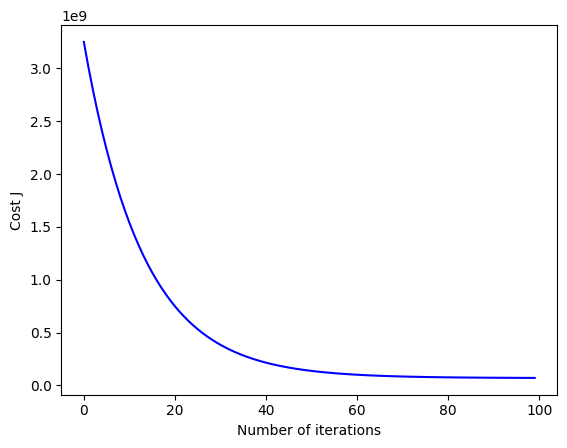

In [ ]:
#You have to reproduce this graph
plt.plot(np.arange(100), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 127134.91360616997
